# 基本文字處理

In [1]:
import pandas as pd

## 計算文字次數

### 計算某個詞在字串中出現的次數

In [2]:
list1 = ["我", "你", "他", "你", "你", "你"]
target = ["我", "你"]

list_voice = []
for i in target:
    voice = list1.count(i)
    list_voice.append(voice)

dic = {"words": target, "voice": list_voice}
voice_df = pd.DataFrame(dic)
voice_df

,words,voice
0,我,1
1,你,4


In [3]:
list(zip(target, list_voice))

[('我', 1), ('你', 4)]

In [4]:
listvoice_df = pd.DataFrame(list(zip(target, list_voice)), columns=(["關鍵字", "次數"]))
listvoice_df

,關鍵字,次數
0,我,1
1,你,4


### Exercise 1: 請計算下列各字出現的次數

In [5]:
from collections import Counter

list2 = ["我", "你", "他", "你", "你", "你"]

dict(Counter(list2))

{'我': 1, '你': 4, '他': 1}

## 欄位讀取

### DataFrame 逐列讀取

In [6]:
for  i in range(len(voice_df)):
    print(f"關鍵字:  {voice_df.words.iloc[i]}   聲量: {voice_df.voice.iloc[i]}")  

關鍵字:  我   聲量: 1
關鍵字:  你   聲量: 4


### 請將下列資料 `df` 以列存取進 `alllist` 串列中

In [7]:
movielist = [
    ["成為王的男人", "預告"],
    ["皇后的品格", "中字"],
    ["赤月青日", "媽媽"],
    ["神的測驗", "官網"],
    ["死之詠讚", "刑警"],
    ["加油吧威基基", "韓國"],
    ["皮諾丘", "預告"],
    ["魔女寶鑑", "中字"],
    ["男朋友", "媽媽"],
    ["來自星星的你", "官網銷售"],
    ["成為王的男人", "預告"],
    ["皇后的品格", "預告"],
]
KoreaDrama = pd.DataFrame(movielist, columns=(["電影", "關鍵字"]))
KoreaDrama

,電影,關鍵字
0,成為王的男人,預告
1,皇后的品格,中字
2,赤月青日,媽媽
3,神的測驗,官網
4,死之詠讚,刑警
5,加油吧威基基,韓國
6,皮諾丘,預告
7,魔女寶鑑,中字
8,男朋友,媽媽
9,來自星星的你,官網銷售


將上述 `korea_drama_df` 轉為原本的 list

In [8]:
alllist = KoreaDrama.values.tolist()
alllist

[['成為王的男人', '預告'],
 ['皇后的品格', '中字'],
 ['赤月青日', '媽媽'],
 ['神的測驗', '官網'],
 ['死之詠讚', '刑警'],
 ['加油吧威基基', '韓國'],
 ['皮諾丘', '預告'],
 ['魔女寶鑑', '中字'],
 ['男朋友', '媽媽'],
 ['來自星星的你', '官網銷售'],
 ['成為王的男人', '預告'],
 ['皇后的品格', '預告']]

### 請找出關鍵字有哪些字詞？

In [9]:
KoreaDrama["關鍵字"].unique()

array(['預告', '中字', '媽媽', '官網', '刑警', '韓國', '官網銷售'], dtype=object)

## 資料篩選

### 挑選符合完整字詞的資料

In [10]:
KoreaDrama["電影"]=="成為王的男人"

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
Name: 電影, dtype: bool

In [11]:
KoreaDrama[KoreaDrama["電影"]=="成為王的男人"]

,電影,關鍵字
0,成為王的男人,預告
10,成為王的男人,預告


#### Exercise 2: 請找出 KoreaDrama 中「男朋友」這部片的資料?

In [12]:
KoreaDrama[KoreaDrama["電影"]=="男朋友"]

,電影,關鍵字
8,男朋友,媽媽


### 挑選符合部分字詞的資料

In [13]:
KoreaDrama["電影"].str.contains("王的|皇后")

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
Name: 電影, dtype: bool

In [14]:
KoreaDrama[KoreaDrama["電影"].str.contains("王的|皇后")]

,電影,關鍵字
0,成為王的男人,預告
1,皇后的品格,中字
10,成為王的男人,預告
11,皇后的品格,預告


#### Exercise 3: 請找出關鍵字有"網"或"國"的資料?

In [15]:
KoreaDrama[KoreaDrama["關鍵字"].str.contains("網|國")]

,電影,關鍵字
3,神的測驗,官網
5,加油吧威基基,韓國
9,來自星星的你,官網銷售


### Exercise 4: 請找出KoreaDrama中符合以下電影的資料

`['成為王的男人','皇后的品格']`

In [16]:
KoreaDrama[KoreaDrama["電影"].isin(["成為王的男人", "皇后的品格"])]

,電影,關鍵字
0,成為王的男人,預告
1,皇后的品格,中字
10,成為王的男人,預告
11,皇后的品格,預告


### Exercise 5 Advanced: 找出"關鍵字"欄位中包含"官網"但不包含"銷售"的資料 

In [17]:
KoreaDrama[KoreaDrama["關鍵字"].str.contains("官網") & ~KoreaDrama["關鍵字"].str.contains("銷售")]

,電影,關鍵字
3,神的測驗,官網


### Exercise 6: "成為王的男人"關鍵字有哪些,列出"關鍵詞"與"個數"

In [18]:
KoreaDrama[KoreaDrama["電影"] == "成為王的男人"]["關鍵字"].value_counts()


關鍵字
預告    2
Name: count, dtype: int64

### 成為王的男人的關鍵字，符合下列關鍵字哪一些，請以df顯示

In [19]:
KoreaDrama["電影"].str.contains("成為王的男人")
KoreaDrama_wang = KoreaDrama[KoreaDrama["電影"].str.contains("成為王的男人")]

focus_keyword = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

focus_keyword_voice = []
for j in focus_keyword:
    keyword_list = list(KoreaDrama_wang["關鍵字"])
    focus_keyword_voice.append(keyword_list.count(j))

focus_keyword_voice

[2, 0, 0, 0, 0, 0]

In [20]:
moviekey_df = pd.DataFrame(
    list(zip(focus_keyword, focus_keyword_voice)), columns=(["關鍵字", "次數"])
)

moviekey_df

,關鍵字,次數
0,預告,2
1,中字,0
2,媽媽,0
3,官網,0
4,刑警,0
5,韓國,0


## Exercise 7: 雙重迴圈應用，下列電影各關鍵詞次數

hint: 在某資料集中先找出相關資料，再由相關資料中找字詞，如找某電影某關鍵字出現次數 

In [21]:
movie = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

focus_keyword = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

# 取出所有電影的關鍵詞
keywords = KoreaDrama[KoreaDrama["電影"].isin(movie)]["關鍵字"]

# 計算關鍵詞出現次數
keyword_counts = keywords.value_counts()

# 只留下 focus_keyword 中的關鍵詞
keyword_counts = keyword_counts[focus_keyword]

# 顯示關鍵詞及其出現次數
print(keyword_counts)

關鍵字
預告    4
中字    2
媽媽    2
官網    1
刑警    1
韓國    1
Name: count, dtype: int64


In [22]:
movie = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]

focus_keyword = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

KoreaDrama[KoreaDrama["電影"].isin(movie)]["關鍵字"].value_counts()[focus_keyword]

關鍵字
預告    4
中字    2
媽媽    2
官網    1
刑警    1
韓國    1
Name: count, dtype: int64

## 串列練習

### 找出下列兩字串共有的元素

In [23]:
list1 = ["你好", "我愛你", "他", "我"]
list2 = ["他", "我"]

[item for item in list1 if item in list2]

['他', '我']

#### Exercise 8: 找出兩字串不同的元素

In [24]:
words = ["你好", "我愛你", "他", "我"]
stopwords = ["他", "我"]

[item for item in words if item not in stopwords]

['你好', '我愛你']

### 串列表達式 list comprehension

`[你要的值 for i in 迭代物]`，出來的結果還是串列

In [25]:
list1 = [1, 2, 3, 4]
[i * 2 for i in list1]

[2, 4, 6, 8]

#### Exercise 9: 將上述串列 `[1,2,3,4]` 變成 `['1$','2$','3$','4$']`

In [26]:
list1 = [1, 2, 3, 4]
[f'{i}$' for i in list1]

['1$', '2$', '3$', '4$']

#### Exercise 10: 將上述串列 `['1$','2$','3$','4$']` 列印出來如下結果 `1$ 2$ 3$ 4$`

In [27]:
list1 = [1, 2, 3, 4]

" ".join([f'{i}$' for i in list1])

'1$ 2$ 3$ 4$'

#### 將以下串列字元改為大寫

hint: `i.upper()`

In [28]:
string1 = "abcd"

[i.upper() for i in string1]

['A', 'B', 'C', 'D']

#### Exercise 11: 空格改底線

將以下串列字元['Company 1','Company 2','Company 3']改為['Company_1','Company_2','Company_3']

In [29]:
listcompany=['Company 1','Company 2','Company 3']

[i.replace(" ", "_") for i in listcompany]

['Company_1', 'Company_2', 'Company_3']

#### 兩個串列逐一相乘，再產生新串列

In [30]:
list1 = [1, 2, 3, 4]
list2 = [5, 6, 7, 8]
res = [a * b for a, b in zip(list1, list2)]
res

[5, 12, 21, 32]

#### Exercise 12: 合併成 tuple

請將兩個串列[1,2,3,4]和[5,6,7,8]變成一個串列[(1,5),(2,6),(3,7),(4,8)] 

In [64]:
list1 = [1, 2, 3, 4]
list2 = [5, 6, 7, 8]
res = list(zip(list1, list2))
res

[(1, 5), (2, 6), (3, 7), (4, 8)]

### 用串列表達式計算字元

In [32]:
words1 = ["你", "你", "他", "我"]
words1voice = [words1.count(i) for i in words1]
allwordds1voice = pd.DataFrame(zip(words1, words1voice), columns=(["關鍵字", "次數"]))
allwordds1voice.drop_duplicates(inplace=True)
print(allwordds1voice)

  關鍵字  次數
0   你   2
2   他   1
3   我   1


## 基本 jieba 練習

In [33]:
### Jieba 加入繁體中文辭庫
import jieba

# 設定分詞資料庫
jieba.set_dictionary('assets/dict.txt.big')

### 範例1 - `cut_all=False` 精確模式

In [34]:
sentence='我今天要到高雄小港機場搭飛機出差黛安芬華歌爾曼黛瑪蓮addidasNikepumaiphone瑪登瑪朵高雄發大財寶藍藍桃紅咖啡色粉色螢光綠粉'

# 切割完會變迭代物件
# 預設是 cut_all=False 所以這句可以省略
breakword = jieba.cut(sentence, cut_all=False)
print(type(breakword))

# 切割完會變列表
# 預設是 cut_all=False 所以這句可以省略
breakword = jieba.lcut(sentence, cut_all=False)
print(type(breakword))

breakword

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache


<class 'generator'>


Loading model cost 0.190 seconds.
Prefix dict has been built successfully.


<class 'list'>


['我',
 '今天',
 '要',
 '到',
 '高雄',
 '小港',
 '機場',
 '搭',
 '飛機',
 '出差',
 '黛安芬華',
 '歌爾曼',
 '黛瑪蓮',
 'addidasNikepumaiphone',
 '瑪登瑪朵',
 '高雄',
 '發大財',
 '寶藍',
 '藍桃紅',
 '咖啡色',
 '粉色',
 '螢光',
 '綠粉']

### 範例1 - `cut_all=True` 全模式

In [35]:
sentence = "我今天要到高雄小港機場搭飛機出差黛安芬華歌爾曼黛瑪蓮addidasNikepumaiphone瑪登瑪朵高雄發大財寶藍藍桃紅咖啡色粉色螢光綠粉"

breakword = jieba.cut(sentence, cut_all=True)  # 切割完會變迭代物件

print("|".join(breakword))

我|今天|要|到|高|雄|小港|機|場|搭|飛|機|出差|黛|安|芬|華|歌|爾|曼|黛|瑪|蓮|addidasNikepumaiphone|瑪|登|瑪|朵|高|雄|發|大|財|寶藍|藍|桃|紅|咖啡|咖啡色|粉|色|螢|光|綠|粉


### 範例2

In [36]:
sentence1 = "寶藍棗紅紫粉粉橘墨綠深藍酒紅軍綠色熒光綠深灰藏青黃紅桃焦糖咖啡色紫色藍橘膚粉色綠灰白黑"
breakword1 = jieba.cut(sentence1, cut_all=False)
print("|".join(breakword1))

寶藍|棗紅|紫粉|粉橘|墨綠|深藍酒|紅軍綠色|熒光|綠|深灰藏|青黃紅桃|焦糖|咖啡色|紫色|藍|橘膚|粉色|綠灰白|黑


### Jieba 加入繁體中文辭庫及自訂詞

In [37]:
# 設定分詞資料庫
jieba.set_dictionary('assets/dict.txt.big')

# 將自己常用的詞加入字典
jieba.load_userdict('assets/user_dict.txt')

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache
Loading model cost 0.192 seconds.
Prefix dict has been built successfully.


In [38]:
sentence = "我今天要到高雄小港機場搭飛機出差黛安芬華歌爾曼黛瑪蓮addidasNikepumaiphone瑪登瑪朵高雄發大財成為王的男人皇后的女人陳時中"

breakword = jieba.cut(sentence, cut_all=False)
print("|".join(breakword))

我|今天|要|到|高雄|小港機場|搭飛機|出差|黛安芬|華歌爾|曼黛瑪蓮|addidas|Nike|puma|iphone|瑪登瑪朵|高雄發大財|成為王的男人|皇后的女人|陳時中


### Jieba 加入繁體中文辭庫、自訂詞、及停用詞

In [39]:
jieba.set_dictionary("assets/dict.txt.big")
jieba.load_userdict("assets/user_dict.txt")

with open("assets/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = f.readlines()

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache
Loading model cost 0.198 seconds.
Prefix dict has been built successfully.


In [40]:
sentence = "我今天要到高雄小港機場搭飛機出差黛安芬華歌爾曼黛瑪蓮addidasNikepumaiphone瑪登瑪朵高雄發大財成為王的男人皇后的女人!!"
breakword = jieba.cut(sentence, cut_all=False)

breakword_clean = [word for word in breakword if word not in stops]
print("|".join(breakword_clean))

我|今天|要|到|高雄|小港機場|搭飛機|出差|黛安芬|華歌爾|曼黛瑪蓮|addidas|Nike|puma|iphone|瑪登瑪朵|高雄發大財|成為王的男人|皇后的女人|!|!


#### Exercise 13: 請進行以下文字切詞，並移除無意義文字

hint: 句子切詞，比對不是stopwords則取出

In [41]:
strdemo = "#高雄科技大學@@"
stopwords = ["@", "#"]

breakword = jieba.cut(strdemo, cut_all=False)
breakword_clean = [word for word in breakword if word not in stopwords]
print("|".join(breakword_clean))

高雄科技大學


## 文字雲

In [42]:
from wordcloud import WordCloud  # 文字雲
import matplotlib.pyplot as plt
import matplotlib_inline
from collections import Counter

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [43]:
font_path = r"/System/Library/Fonts/Supplemental/Arial Unicode.ttf"

### 中文範例 - 無斷詞直接跑文字雲

(np.float64(-0.5), np.float64(2399.5), np.float64(2399.5), np.float64(-0.5))

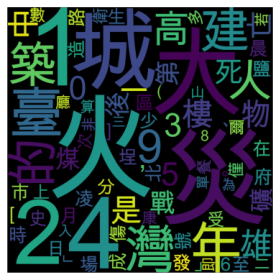

In [44]:
sentence = """高雄城中城大樓火災是一場2021年10月14日凌晨2時54分發生在臺灣高雄市鹽埕區府北路31號「城中城」大樓的建築物火災
。大火造成至少46人死亡、43人受傷[2]，是臺灣戰後史上死亡人數第二多的建築物火災，僅次1995年衛爾康餐廳大火
（若算入非建築火災的1984年煤山煤礦礦災即為戰後臺灣第三大單一火災""".replace("\n", "")

my_wordcloud = WordCloud(
    font_path=font_path,
    collocations=False,
    width=2400,
    height=2400,
    margin=2,
)  # collocations=False, 只顯示「單一詞語」，不會強制顯示詞組

# 生成文字雲
my_wordcloud.generate_from_frequencies(frequencies=Counter(sentence))

# 顯示文字雲
plt.imshow(my_wordcloud)
plt.axis("off")  # 取消座標

(np.float64(-0.5), np.float64(2399.5), np.float64(2399.5), np.float64(-0.5))

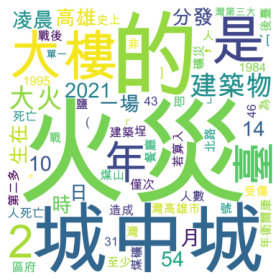

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jieba


# 中文斷詞
sentence = """高雄城中城大樓火災是一場2021年10月14日凌晨2時54分發生在臺灣高雄市鹽埕區府北路31號「城中城」大樓的建築物火災
。大火造成至少46人死亡、43人受傷[2]，是臺灣戰後史上死亡人數第二多的建築物火災，僅次1995年衛爾康餐廳大火
（若算入非建築火災的1984年煤山煤礦礦災即為戰後臺灣第三大單一火災""".replace("\n", "")
sentence_list = jieba.cut(sentence, cut_all=False)

# 中文繪圖需要中文字體，設定字型，微軟正黑體
my_wordcloud = WordCloud(
    font_path=font_path,
    collocations=False,
    width=2400,
    height=2400,
    margin=2,
    background_color="white",
)

# 生成文字雲
my_wordcloud.generate_from_frequencies(frequencies=Counter(sentence_list))

# 顯示文字雲
plt.imshow(my_wordcloud)
plt.axis("off")  # 取消座標

#### Exercise 14: 請將上述中文句子(sentence)斷詞後，再去掉停用詞，再來繪出文字雲

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache
Loading model cost 0.229 seconds.
Prefix dict has been built successfully.


(np.float64(-0.5), np.float64(2399.5), np.float64(2399.5), np.float64(-0.5))

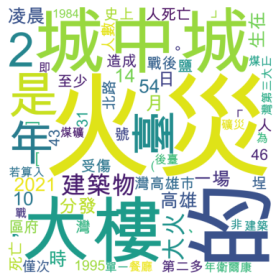

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jieba

jieba.set_dictionary('assets/dict.txt.big')
jieba.load_userdict('assets/user_dict.txt')

# 中文斷詞
sentence = """高雄城中城大樓火災是一場2021年10月14日凌晨2時54分發生在臺灣高雄市鹽埕區府北路31號「城中城」大樓的建築物火災
。大火造成至少46人死亡、43人受傷[2]，是臺灣戰後史上死亡人數第二多的建築物火災，僅次1995年衛爾康餐廳大火
（若算入非建築火災的1984年煤山煤礦礦災即為戰後臺灣第三大單一火災""".replace("\n", "")
sentence_list = jieba.cut(sentence, cut_all=False)

with open("assets/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = f.readlines()

# 中文繪圖需要中文字體，設定字型，微軟正黑體
my_wordcloud = WordCloud(
    font_path=font_path,
    collocations=False,
    width=2400,
    height=2400,
    margin=2,
    stopwords=stops,
    background_color="white",
)

sentence_without_stopwords = (word for word in sentence_list if word not in stops)
my_wordcloud.generate_from_frequencies(frequencies=Counter(sentence_without_stopwords))

# 顯示文字雲
plt.imshow(my_wordcloud)
plt.axis("off")  # 取消座標

### 英文範例

(np.float64(-0.5), np.float64(2399.5), np.float64(2399.5), np.float64(-0.5))

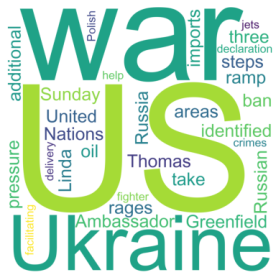

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sentence1='''
US Ambassador to the United Nations Linda Thomas-Greenfield on Sunday identified three areas
where the US could take additional steps to ramp up pressure on Russia as its war in Ukraine rages on:
a ban on Russian oil imports, a declaration of war crimes, and help facilitating delivery of Polish fighter jets to Ukraine.
'''
my_wordcloud = WordCloud(font_path=font_path, width=2400, height=2400, margin=2, stopwords=STOPWORDS, background_color='white')  #注意有stopwords這個參數，將the這些無意義詞去除

#生成文字雲
my_wordcloud.generate(sentence1)

#顯示文字雲
plt.imshow(my_wordcloud)
plt.axis("off") #取消座標

## 資料清理

用 replace 某字串去除無用字元。在 jieba 之前要把無用的字元去除掉，以免無用字元被切為字詞

In [48]:
import functools

webwords = """
"2019最新圖文好讀版: <a href=""http://q82465.pixnet.net/blog/post/218879349"" rel=""nofollow"" target=""_blank"">http://q82465.pixnet.net/blog/post/218879349</a>

2019/7月更新版本: <a href=""/bbs/BabyMother/M.1564022996.A.415.html"" rel=""nofollow"" target=""_blank"">#1TEHZKGL</a>

托育補助和育兒津貼則是將寶寶送托或自己帶會有不同幅度的補貼，分類如下:

*** 0-2歲寶寶的補助 (限所得稅率未達20%且無同時請領育嬰留停津貼)

1. 公辦托嬰中心/公共托育家園: 每月領3000元托育補助

2. 準公共化托嬰中心/準公共化保母: 每月領6000元托育補助

3. 其他(未簽約托嬰中心/未簽約保母/爺奶/自行照顧): 每月領2500元育兒津貼
"""

removeword = [
    "span",
    "class",
    "f3",
    "https",
    "imgur",
    "h1",
    "_   blank",
    "href",
    "rel",
    "nofollow",
    "target",
    "cdn",
    "cgi",
    "b4",
    "jpg",
    "hl",
    "b1",
    "f5",
    "f4",
    "goo.gl",
    "f2",
    "email",
    "map",
    "f1",
    "f6",
    "__cf___",
    "data",
    "bbshtml",
    "cf",
    "f0",
    "b2",
    "b3",
    "b5",
    "b6",
    "原文內容",
    "原文連結",
    "作者標題",
    "時間",
    "看板",
    "<",
    ">",
    "，",
    "。",
    "？",
    "—",
    "閒聊",
    "・",
    "/",
    " ",
    "=",
    '"',
    "\n",
    "」",
    "「",
    "！",
    "[",
    "]",
    "：",
    "‧",
    "╦",
    "╔",
    "╗",
    "║",
    "╠",
    "╬",
    "╬",
    ":",
    "╰",
    "╩",
    "╯",
    "╭",
    "╮",
    "│",
    "╪",
    "─",
    "《",
    "》",
    "_",
    ".",
    "、",
    "（",
    "）",
    "　",
    "*",
    "※",
    "~",
    "○",
    "”",
    "“",
    "～",
    "@",
    "＋",
    "\r",
    "▁",
    ")",
    "(",
    "-",
    "═",
    "?",
    ",",
    "!",
    "…",
    "&",
    ";",
    "『",
    "』",
    "#",
    "＝",
    "\\l",
    "blog",
    "html",
    "post",
    "http",
    "pixnet",
]

# 移除無意義的字元
webwords_cleaned = functools.reduce(
    lambda x, y: x.replace(y, ""), removeword, webwords
)

webwords_cleaned

'2019最新圖文好讀版aq82465net218879349blankq82465net218879349a20197月更新版本abbsBabyMotherM1564022996A415blank1TEHZKGLa托育補助和育兒津貼則是將寶寶送托或自己帶會有不同幅度的補貼分類如下02歲寶寶的補助限所得稅率未達20%且無同時請領育嬰留停津貼1公辦托嬰中心公共托育家園每月領3000元托育補助2準公共化托嬰中心準公共化保母每月領6000元托育補助3其他未簽約托嬰中心未簽約保母爺奶自行照顧每月領2500元育兒津貼'

### df單欄位去除無用字元，示範一列

In [49]:
underwear = pd.read_csv("assets/underwear_test_clear.csv")

underwear["內容"].iloc[0]  # 清除前

for i in removeword:
    underwear.loc[0,"內容"] = underwear["內容"].iloc[0].replace(i, "")

cleaned_v1 = underwear["內容"].iloc[0]  # 清除後
cleaned_v1

'先祝各位新年快樂內衣上緣微微的外翻穿衣服都會有內衣痕覺得不太雅觀板上有人問一樣的問題雖然照著那篇的推文做了但還是沒有改善QQ不曉得還有沒有什麼好辦法呢謝謝各位'

### df 單欄位去除無用字元。示範一列。並做 jieba 切詞

In [50]:
underwear = pd.read_csv("assets/underwear_test_clear.csv")

before = underwear["內容"].iloc[0]  # 清除前

for i in removeword:
    underwear.loc[0,"內容"] = underwear["內容"].iloc[0].replace(i, "")

after = underwear["內容"].iloc[0]  # 清除後

In [51]:
import jieba
jieba.set_dictionary('assets/dict.txt.big')

清 removeword 前

In [52]:
underwear_jieba = jieba.cut(before, cut_all=False)

"|".join(underwear_jieba)

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/02-share-of-voice/assets/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u6e9054f30d8bff41ff092210c9dc3fac.cache
Loading model cost 0.195 seconds.
Prefix dict has been built successfully.


'先祝|各位|新年|快樂|~|~|~|\n|\n|內衣|上緣|微微|的|外翻| |穿衣服|都|會|有|內衣|痕|\n|覺得|不太雅觀|@|@|\n|板|上有|人問|一樣|的|問題|\n|雖然|照著|那篇|的|推文|做|了| |但|還是|沒有|改善|QQ|\n|不曉|得|還有|沒有|什麼|好辦|法|呢|？|\n|謝謝|各位'

清 removeword 後

In [53]:
underwear_jieba = jieba.cut(after, cut_all=False)

"|".join(underwear_jieba)

'先祝|各位|新年|快樂|內衣|上緣|微微|的|外翻|穿衣服|都|會|有|內衣|痕覺|得|不太雅|觀板|上有|人問|一樣|的|問題|雖然|照著|那篇|的|推文|做|了|但|還是|沒有|改善|QQ|不曉|得|還有|沒有|什麼|好辦|法|呢|謝謝|各位'

### Exercise 15: 單欄位全部列去除無用字元

單欄位(underwear["內容"])全部列去除無用字元,hint:用def自定副程式方式來做

In [54]:
import pandas as pd
import functools

underwear = pd.read_csv("assets/underwear_test_clear.csv")

underwear["內容"] = underwear["內容"].apply(
    lambda x: functools.reduce(lambda y, z: y.replace(z, ""), removeword, x)
)

underwear

,Unnamed: 0.1,Unnamed: 0,標題,時間,內容,類別,版名,文章ID,作者,IP,總留言數,留言內容,推推總數,噓聲總數,中立總數,所有文,留言總數
0,5,5,[問題] 上緣翹翹的,2022/2/5 16:45,先祝各位新年快樂內衣上緣微微的外翻穿衣服都會有內衣痕覺得不太雅觀板上有人問一樣的問題雖然照著...,問題,underwear,M.1644050759.A.91C,shots (LMFAO),(臺灣),5,"[{'type': '推', 'user': 'thefirstskyt', 'conten...",2,0,3,問題上緣翹翹先祝各位新年快樂內衣上緣微微外翻穿衣服都會有內衣痕覺得不太雅觀板上有人問一樣問題...,5
1,6,6,[贈送] Easy Shop 無鋼圈內衣70D,2022/2/3 10:29,aicomSOFv3emnoreferrernoopenerblankicomSOFv3em...,贈送,underwear,M.1643855370.A.C33,claireiro69 (Clara),(臺灣),0,[],0,0,0,贈送EasyShop無鋼圈內衣70DaicomSOFv3emnoreferrernoopen...,0
2,7,7,Fw: [情報] 台北松江路曼黛瑪璉內衣特賣~2件900元,2022/2/3 00:48,作者sisy1017西西Actuary標題情報台北松江路曼黛瑪璉內衣特賣2件900元ThuF...,情報,underwear,M.1643820494.A.7A0,sisy1017 (西西),(臺灣),0,[],0,0,0,Fw情報台北松江路曼黛瑪璉內衣特賣2件900元作者sisy1017西西Actuary標題情報...,0
3,8,8,[贈送] 束褲,2022/1/30 00:50,已剪標下水的未穿束褲記得是百貨公司華歌爾貨為了節食買的卻一直想等下次再節食到後來已穿不下就放...,贈送,underwear,M.1643475036.A.AEC,SophiaH (Sophia),(臺灣),3,"[{'type': '推', 'user': 'ie975249', 'content': ...",1,0,2,贈送束褲已剪標下水未穿束褲記得是百貨公司華歌爾貨為了節食買卻一直想等下次再節食到後來已穿不下...,3
4,9,9,[心得] aubade數套分享及馬甲修改資訊,2022/1/29 23:53,內衣品牌aubade品名或型號1aubade激情夜曲2aubade傾心3aubade激情女人...,心得,underwear,M.1643471616.A.FC1,yzzi1159 (yzzi1159),(臺灣),5,"[{'type': '推', 'user': 'Fantasyweed', 'content...",4,0,1,心得aubade數套分享及馬甲修改資訊內衣品牌aubade品名或型號1aubade激情夜曲2...,5
5,10,10,[贈送] 薄蕾絲75D內衣一件,2022/1/27 21:19,同款買了兩色覺得還是喜歡薄杯內衣故釋出全新灰紫色一件久放不影響狀況如圖aicomgPuEn2...,贈送,underwear,M.1643289589.A.1B0,DollyPig (˙3 ˙),(臺灣),0,[],0,0,0,贈送薄蕾絲75D內衣一件同款買了兩色覺得還是喜歡薄杯內衣故釋出全新灰紫色一件久放不影響狀況如...,0
6,11,11,[心得] 紅紅褲pro心得,2022/1/25 14:47,內褲品牌Khòo品名或型號紅紅褲Pro超吸收中腰黑色心得目前穿了一次經期分別是第二天跟第四天...,心得,underwear,M.1643093269.A.924,nita1228 (qpaz86512),(臺灣),14,"[{'type': '→', 'user': 'queen0908', 'content':...",7,0,7,心得紅紅褲pro心得內褲品牌Khòo品名或型號紅紅褲Pro超吸收中腰黑色心得目前穿了一次經期...,14
7,12,12,[心得] Salute貝殼杯vs.Aubade版型,2022/1/22 00:45,平常慣穿AubadeChantelle等法國牌內衣可能是胸距寬底盤大偏尖杯這幾個條件組合之下...,心得,underwear,M.1642783559.A.347,metaphorist (諾黑),(臺灣),11,"[{'type': '推', 'user': 'tooru', 'content': '我去...",8,0,3,心得Salute貝殼杯vsAubade版型平常慣穿AubadeChantelle等法國牌內衣...,11
8,13,13,Fw: [情報] 台北曼黛瑪璉內衣特賣~內衣2件900元,2022/1/14 00:17,作者sisy1017西西Actuary標題情報台北曼黛瑪璉內衣特賣內衣2件900元FriJa...,情報,underwear,M.1642090674.A.6AB,sisy1017 (西西),(臺灣),0,[],0,0,0,Fw情報台北曼黛瑪璉內衣特賣內衣2件900元作者sisy1017西西Actuary標題情報台...,0


## 用正規表達式去除無用字元

- https://regex101.com/
- 正規表達式常用規則 https://yanwei-liu.medium.com/python%E6%AD%A3%E8%A6%8F%E8%A1%A8%E9%81%94%E5%BC%8F-fbffb92972dc
- 符號說明
  - `*`：前面的字元可出現零次以上
  - `+`：前面的字元至少要出現一次以上
  - `{m,n}`：前面的字元可出現m次~n次(包含)
  - `[0-9]`：0~9之間的任意數字
  - `[a-z]`：a~z之間的任意文字(小寫)
  - `[A-Z]`：A~Z之間的任意文字(大寫)
  - `.`：代表任何字元(符號、數字、空格)
  - `\` :跳脫字元  例如：`\+`(尋找+號)
  - `|`：代表"或"(符合其中一個即可)
  - `\w`：代表任何字母或數字，等同於[a-z A-Z 0-9]
  - `\d`：代表匹配十進位數字，即[0-9]


In [55]:
import re

name = "徐2先生[]"

### 用正規表達式去除數字

In [56]:
re.sub(r"\d+", "", name)

'徐先生[]'

### 用正規表達式去除所有無意義字元

In [57]:
re.sub(r"(\d)|(\[])", "", name)

'徐先生'

### Exercise 16: 請用str的replace做到上述功能


In [58]:
removeword = ["2", "[]"]
cleaned_name = name

for i in removeword:
    cleaned_name = cleaned_name.replace(i, "")

cleaned_name




'徐先生'

### 尋找字串中有網址的並取代

In [59]:
import re

website = "高雄科技大學http://nkust.edu.tw"
pattern = r"[a-zA-z]+://[^\s]*"
re.sub(pattern, "", website)


'高雄科技大學'

### 尋找字串中有英文和數字並取代

In [60]:
import re

website1 = "高雄科技大學333388888AAAA"
pattern1 = r"[A-Za-z0-9]+$"
re.sub(pattern1, "", website1)

'高雄科技大學'

### Exercise 17: 使用正規表達式，取代下列網址變空白

hint:網址URL正規表述式 `[a-zA-z]+://[^\s]*`

In [61]:
import re

content = """
https://www.nkust.edu.tw/
http://yahoo1.com.tw/
http://www.idealcard.com.tw/download_01.php 哪裡買
"""

cleaned_content = re.sub(r"[a-zA-z]+://[^\s]*", "", content)
cleaned_content = cleaned_content.replace("\n", "").strip()
cleaned_content

'哪裡買'

### Exercise 18: 請將下列文字去除無意義的字元，以及用正規表達式去除數字與英文字

In [62]:
webwords = """
"2019最新圖文好讀版: <a href=""http://q82465.pixnet.net/blog/post/218879349"" rel=""nofollow"" target=""_blank"">http://q82465.pixnet.net/blog/post/218879349</a>

2019/7月更新版本: <a href=""/bbs/BabyMother/M.1564022996.A.415.html"" rel=""nofollow"" target=""_blank"">#1TEHZKGL</a>

托育補助和育兒津貼則是將寶寶送托或自己帶會有不同幅度的補貼，分類如下:

*** 0-2歲寶寶的補助 (限所得稅率未達20%且無同時請領育嬰留停津貼)

1. 公辦托嬰中心/公共托育家園: 每月領3000元托育補助

2. 準公共化托嬰中心/準公共化保母: 每月領6000元托育補助

3. 其他(未簽約托嬰中心/未簽約保母/爺奶/自行照顧): 每月領2500元育兒津貼
"""

# 無意義字元清單
removeword = [
    "span",
    "class",
    "f3",
    "https",
    "imgur",
    "h1",
    "_   blank",
    "href",
    "rel",
    "nofollow",
    "target",
    "cdn",
    "cgi",
    "b4",
    "jpg",
    "hl",
    "b1",
    "f5",
    "f4",
    "goo.gl",
    "f2",
    "email",
    "map",
    "f1",
    "f6",
    "__cf___",
    "data",
    "bbs",
    "html",
    "cf",
    "f0",
    "b2",
    "b3",
    "b5",
    "b6",
    "原文內容",
    "原文連結",
    "作者",
    "標題",
    "時間",
    "看板",
    "<",
    ">",
    "，",
    "。",
    "？",
    "—",
    "閒聊",
    "・",
    "/",
    " ",
    "=",
    '"',
    "\n",
    "」",
    "「",
    "！",
    "[",
    "]",
    "：",
    "‧",
    "╦",
    "╔",
    "╗",
    "║",
    "╠",
    "╬",
    "╬",
    ":",
    "╰",
    "╩",
    "╯",
    "╭",
    "╮",
    "│",
    "╪",
    "─",
    "《",
    "》",
    "_",
    ".",
    "、",
    "（",
    "）",
    "　",
    "*",
    "※",
    "~",
    "○",
    "”",
    "“",
    "～",
    "@",
    "＋",
    "\r",
    "▁",
    ")",
    "(",
    "-",
    "═",
    "?",
    ",",
    "!",
    "…",
    "&",
    ";",
    "『",
    "』",
    "#",
    "＝",
    r"\l",
    "blog",
    "post",
    "pixnet",
]

In [63]:
import re
import functools

# 移除無意義字元
cleaned_content = functools.reduce(lambda x, y: x.replace(y, ""), removeword, webwords)

# 移除數字和英文字
cleaned_content = re.sub(r"[\dA-Za-z]+", "", cleaned_content)

cleaned_content

'最新圖文好讀版月更新版本托育補助和育兒津貼則是將寶寶送托或自己帶會有不同幅度的補貼分類如下歲寶寶的補助限所得稅率未達%且無同時請領育嬰留停津貼公辦托嬰中心公共托育家園每月領元托育補助準公共化托嬰中心準公共化保母每月領元托育補助其他未簽約托嬰中心未簽約保母爺奶自行照顧每月領元育兒津貼'

####